In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import random
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing
import math
from scipy.spatial.distance import euclidean as eu

In [2]:
D_path = glob.glob('Data/Dyslexic' + "/*")
C_path = glob.glob('Data/Control' + "/*")

C_data = []
for path in C_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    C_data.append(temp)
    
D_data = []
for path in D_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    D_data.append(temp)

In [21]:
D = [D_data[29], D_data[11],D_data[85],D_data[42],D_data[61]]
C = [C_data[51], C_data[86],C_data[34],C_data[16],C_data[52]]

Dv = [D_data[39], D_data[63],D_data[78],D_data[3],D_data[53]]
Cv = [C_data[18], C_data[1],C_data[50],C_data[80],C_data[73]]


different lengths:

C--
1499 39
999 63
999 78
1999 3
999 53

D--
1999 18
1999 1
1999 50
1999 80
1999 73

In [22]:
for dd in range(5):
    n=random.randint(0, len(D_data))
    print(len(D_data[n]['T']))
    print(n)

1999
47
1499
76
1999
24
1999
33
1999
86


In [23]:
for dd in range(5):
    n=random.randint(0, len(C_data))
    print(len(C_data[n]['T']))
    print(n)

1999
86
999
61
1999
40
1999
68
999
78


In [24]:
def new_vals(data):
    x = [sum(x) for x in zip(data['LX'].to_list(), data['RX'].tolist())]
    y = [sum(x) for x in zip(data['LY'].to_list(), data['RY'].tolist())]
    
    compl = np.array([complex(a,b) for a,b in zip(x, y)])
    
    return compl

# Binning:

## For variable length vectors:
### 1. Normalizing for each: 

In [25]:
var_len = [Dv,Cv]
all_buckets1 = []
for case in range(2):
    for no in range(5):
        d = new_vals(var_len[case][no])
        fft = np.fft.fft(d)     
        sng = []
        
        #cal bucker_size and step size:
        N = int((len(fft) + 1)/250)
        bucket_size = N*50
        step_size = N*10

        for a in range(0,(len(fft) + 1)-(bucket_size + step_size), step_size):
            sng = np.append(sng, sum(np.abs(fft[a:a+bucket_size])))

        sng = np.append(sng, sum(np.abs(fft[-(bucket_size):])))
        mx = np.amax(sng)
        sng = sng/mx
        all_buckets1.append(sng.tolist())


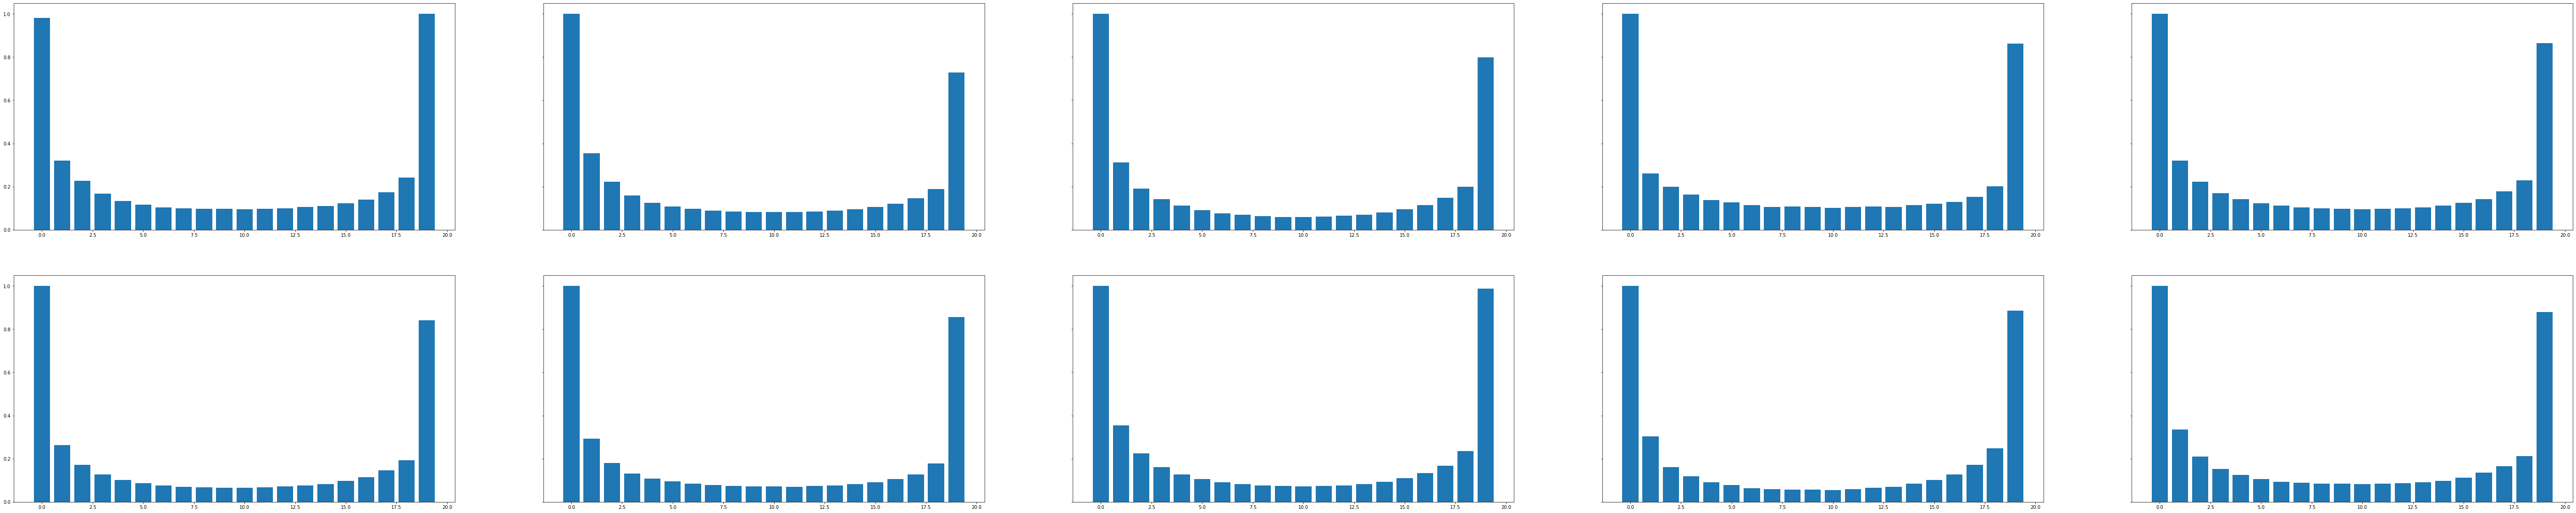

In [26]:
fig, axs = plt.subplots(2,5, sharey = True, figsize = (100,20))
for a in range(len(all_buckets1)):
    values = all_buckets1[a]
    num = list(range(len(values)))
    axs[int(a/5)][a%5].bar(num, values, width=0.8)
    
plt.show()

### 2. Normalizing over all:

In [27]:
all_buckets2 = []

for case in range(2):
    for no in range(5):
        d = new_vals(var_len[case][no])
        fft = np.fft.fft(d)     
        sng = []

        #cal bucker_size and step size:
        N = int((len(fft) + 1)/250)
        bucket_size = N*50
        step_size = N*10

        for a in range(0,(len(fft) + 1)-(bucket_size + step_size), step_size):
            sng = np.append(sng, sum(np.abs(fft[a:a+bucket_size])))

        sng = np.append(sng, sum(np.abs(fft[-(bucket_size):])))
        all_buckets2.append(sng.tolist())

max_all = np.amax(all_buckets2)
all_buckets2 = all_buckets2/max_all

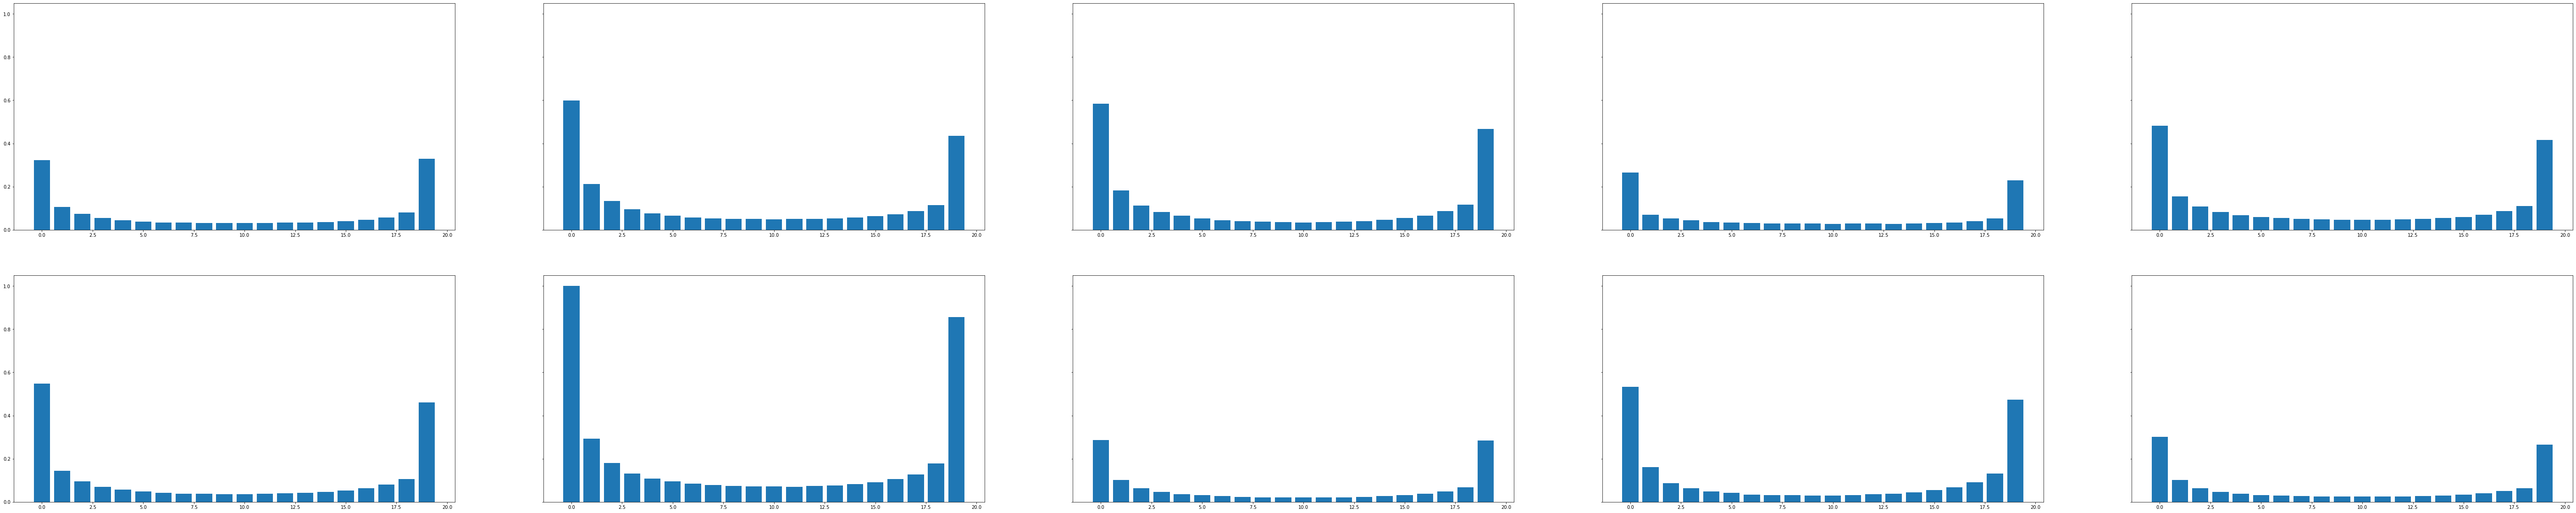

In [28]:
fig, axs = plt.subplots(2,5, sharey = True, figsize = (100,20))
for a in range(len(all_buckets2)):
    values = all_buckets2[a]
    num = list(range(len(values)))
    axs[int(a/5)][a%5].bar(num, values, width=0.8)
    
plt.show()

## For same length Vectors:
### 1. Normalizing for each 

In [29]:
full_len = [D,C]
all_buckets3 = []
N = 8
for case in range(2):
    for no in range(5):
        d = new_vals(full_len[case][no])
        fft = np.fft.fft(d)     
        sng = []
        
        #cal bucker_size and step size:
        bucket_size = N*50
        step_size = N*10

        for a in range(0,2000-(bucket_size + step_size), step_size):
            sng = np.append(sng, sum(np.abs(fft[a:a+bucket_size])))

        sng = np.append(sng, sum(np.abs(fft[-(bucket_size):])))
        mx = np.amax(sng)
        sng = sng/mx
        all_buckets3.append(sng.tolist())


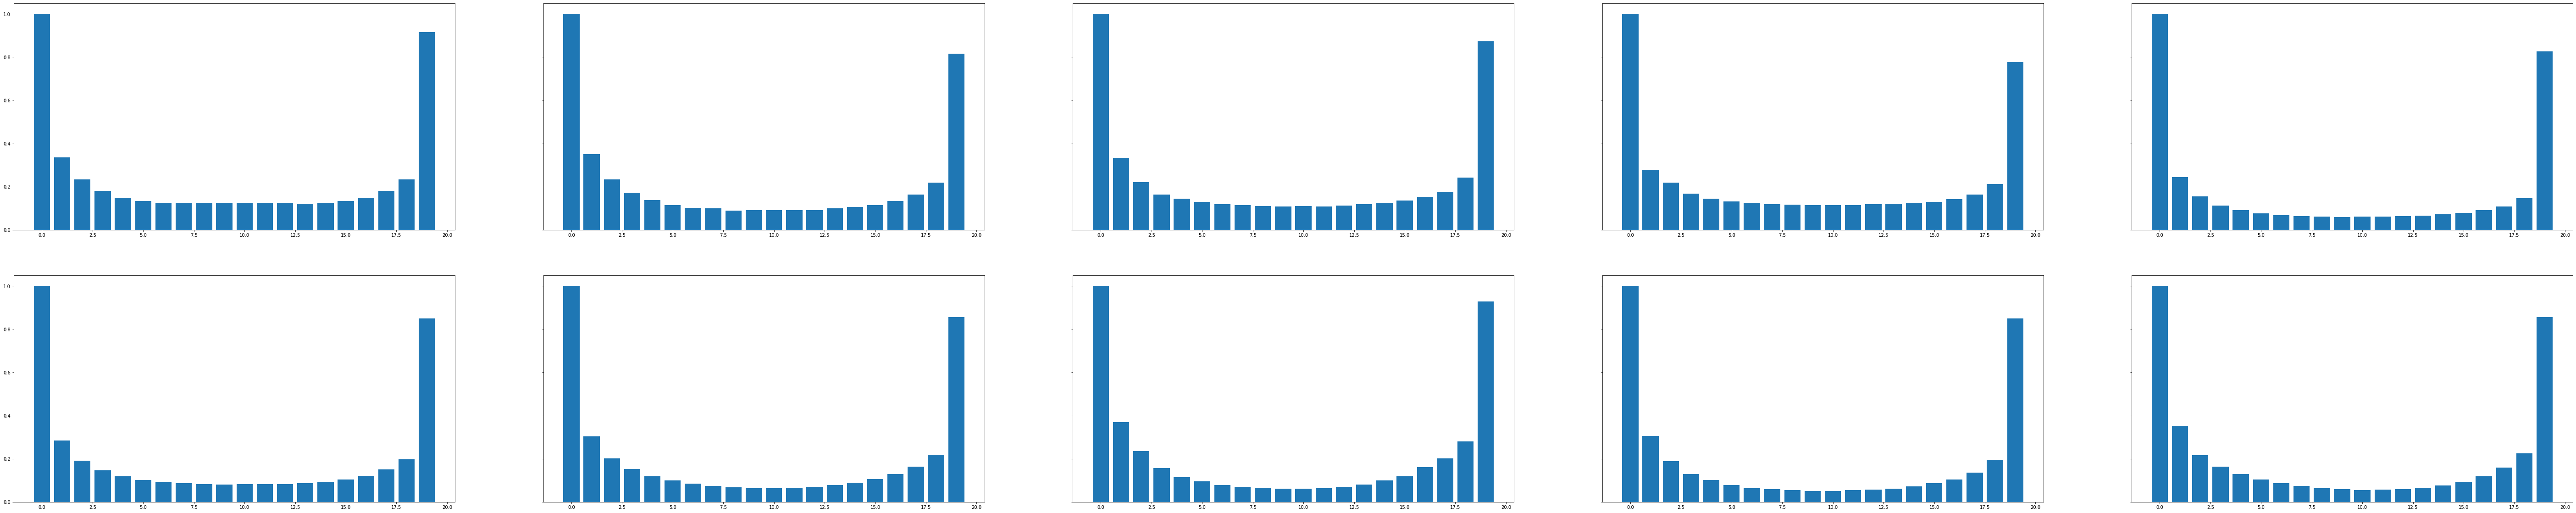

In [30]:
fig, axs = plt.subplots(2,5, sharey = True, figsize = (100,20))
for a in range(len(all_buckets3)):
    values = all_buckets3[a]
    num = list(range(len(values)))
    axs[int(a/5)][a%5].bar(num, values, width=0.8)
    
plt.show()

### 2. Normalizing over all 

In [31]:
all_buckets4 = []
N = 8

for case in range(2):
    for no in range(5):
        d = new_vals(full_len[case][no])
        fft = np.fft.fft(d)     
        sng = []

         #cal bucker_size and step size:
        
        bucket_size = N*50
        step_size = N*10

        for a in range(0,2000-(bucket_size + step_size), step_size):
            sng = np.append(sng, sum(np.abs(fft[a:a+bucket_size])))

        sng = np.append(sng, sum(np.abs(fft[-(bucket_size):])))
        all_buckets4.append(sng.tolist())

max_all = np.amax(all_buckets4)
all_buckets4 = all_buckets4/max_all

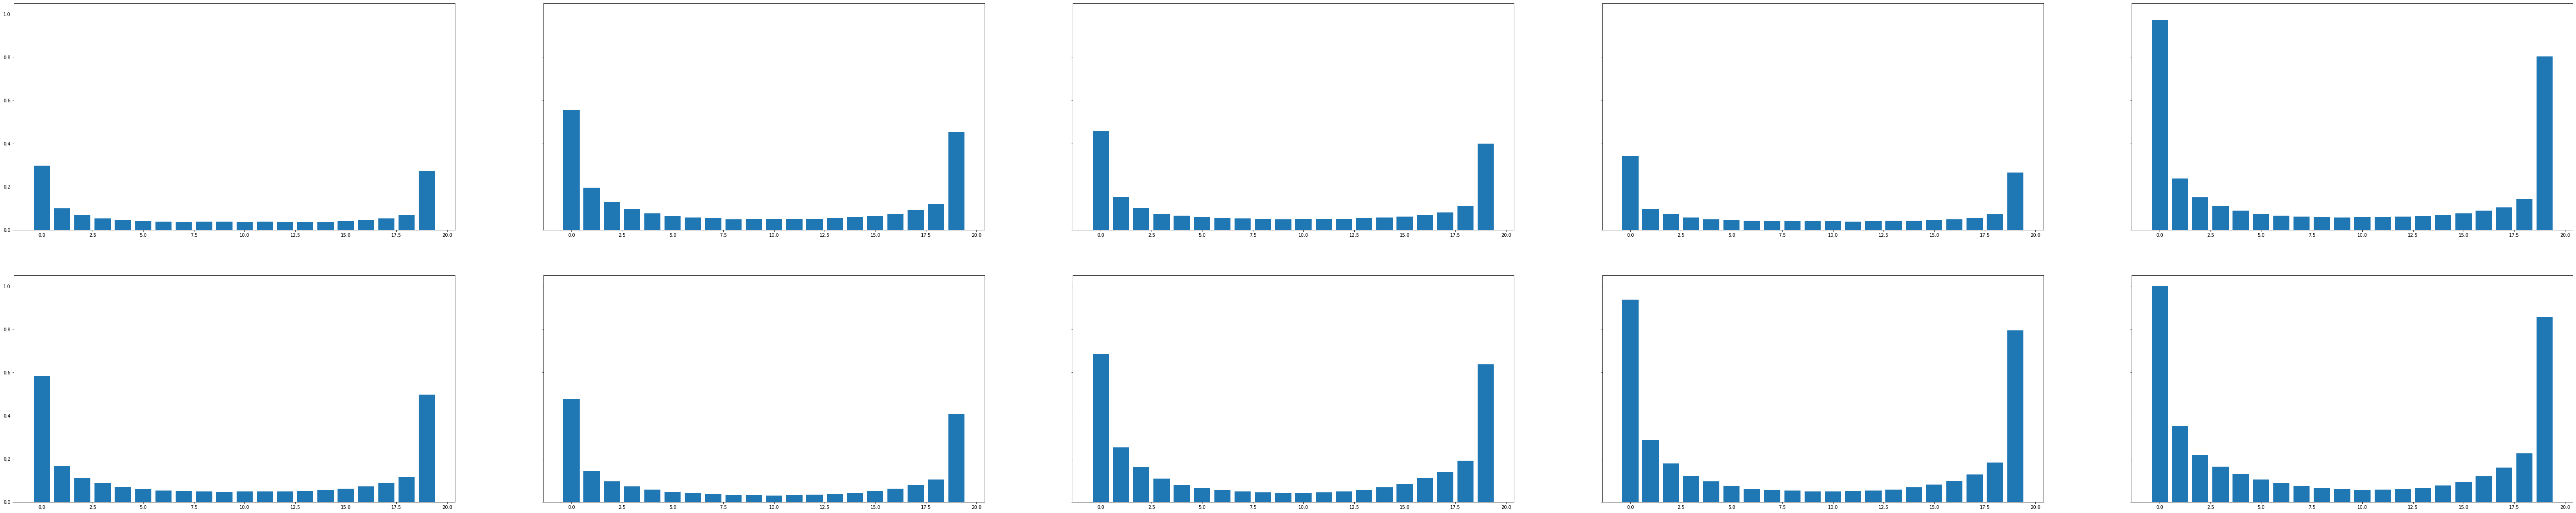

In [32]:
fig, axs = plt.subplots(2,5, sharey = True, figsize = (100,20))
for a in range(len(all_buckets4)):
    values = all_buckets4[a]
    num = list(range(len(values)))
    axs[int(a/5)][a%5].bar(num, values, width=0.8)
    
plt.show()

# Distance Vectors:

In [33]:
def return_sq_im(buckets):    
    matrix = np.empty([10,10])    
    for a in range(10):
        for b in range(10):
            m = buckets[a]
            n = buckets[b]

            dis = eu([m], [n])
            matrix[a][b] = dis 

    mx = np.amax(matrix)
    img = matrix/mx  
    img = img*256
    
    return img

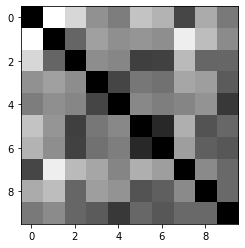

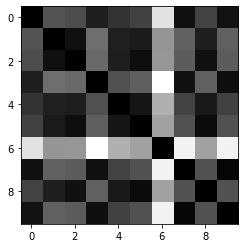

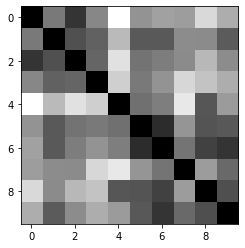

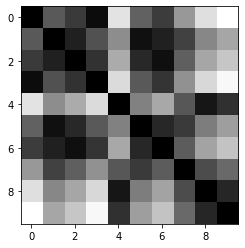

In [34]:
for a in [all_buckets1, all_buckets2, all_buckets3, all_buckets4]:
    img = return_sq_im(a)

    plt.imshow(img, cmap='gray', vmin=0, vmax=256)
    plt.show()